In [2]:
# [1] 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# [2] 데이터 준비
FILE_DATA=r'C:\Users\KDP15\Desktop\KDT6\EX_PANDAS06\DATA\시도별 전출입 인구수.xlsx'

In [4]:
# [3] Excel => DataFrame형태로 저장
dataDF=pd.read_excel(FILE_DATA)

In [5]:
# [4] 데이터 확인
dataDF.info()
print(dataDF.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   전출지별    18 non-null     object
 1   전입지별    324 non-null    object
 2   1970    325 non-null    object
 3   1971    325 non-null    object
 4   1972    325 non-null    object
 5   1973    325 non-null    object
 6   1974    325 non-null    object
 7   1975    325 non-null    object
 8   1976    325 non-null    object
 9   1977    325 non-null    object
 10  1978    325 non-null    object
 11  1979    325 non-null    object
 12  1980    325 non-null    object
 13  1981    325 non-null    object
 14  1982    325 non-null    object
 15  1983    325 non-null    object
 16  1984    322 non-null    object
 17  1985    322 non-null    object
 18  1986    322 non-null    object
 19  1987    325 non-null    object
 20  1988    325 non-null    object
 21  1989    325 non-null    object
 22  1990    325 non-null    ob

In [6]:
# 분석내용 : 연도별로 대구에서 어느지역으로 많이 빠졌는가


In [7]:
# - (1) NaN컬럼에 대한 처리
dataDF[dataDF.columns[0]]

0      NaN
1       전국
2      NaN
3      NaN
4      NaN
      ... 
320    NaN
321    NaN
322    NaN
323    NaN
324    NaN
Name: 전출지별, Length: 325, dtype: object

In [8]:
dataDF[dataDF.columns[0]].ffill(inplace=True)
dataDF.dropna(subset='전출지별',inplace=True)


In [9]:
dataDF.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182
5,전국,인천광역시,-,-,-,-,-,-,-,-,...,565585,478169,462051,499567,468666,461613,452297,473223,441646,409465


In [10]:
# 행인덱스 사용할 컬럼명 추출
dataDF.columns[:2].to_list()

['전출지별', '전입지별']

In [11]:
# - (2) 두개의 컬럼을 행인덱스로 설정
dataDF.set_index([dataDF.columns[0],dataDF.columns[1]],inplace=True)
print(f'[확인]\n{dataDF.head(2)}')

[확인]
               1970     1971     1972     1973     1974     1975     1976  \
전출지별 전입지별                                                                   
전국   전국     4046536  4210164  3687938  4860418  5297969  9011440  6773250   
     서울특별시  1742813  1671705  1349333  1831858  2050392  3396662  2756510   

               1977     1978     1979  ...     2008     2009     2010  \
전출지별 전입지별                              ...                              
전국   전국     7397623  8410276  7324380  ...  8808256  8487275  8226594   
     서울특별시  2893403  3307439  2589667  ...  2025358  1873188  1733015   

               2011     2012     2013     2014     2015     2016     2017  
전출지별 전입지별                                                                  
전국   전국     8127195  7506691  7411784  7629098  7755286  7378430  7154226  
     서울특별시  1721748  1555281  1520090  1573594  1589431  1515602  1472937  

[2 rows x 48 columns]


In [12]:
dataDF.replace('-', pd.NA, inplace=True)

In [13]:
dataDF.fillna(0, inplace=True)

C:\Users\KDP15\AppData\Local\Temp\ipykernel_4948\2775032759.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataDF.fillna(0, inplace=True)


In [14]:
# - object ==> int16 형변환
dataDF=dataDF.astype('int64')
dataDF.dtypes

1970    int64
1971    int64
1972    int64
1973    int64
1974    int64
1975    int64
1976    int64
1977    int64
1978    int64
1979    int64
1980    int64
1981    int64
1982    int64
1983    int64
1984    int64
1985    int64
1986    int64
1987    int64
1988    int64
1989    int64
1990    int64
1991    int64
1992    int64
1993    int64
1994    int64
1995    int64
1996    int64
1997    int64
1998    int64
1999    int64
2000    int64
2001    int64
2002    int64
2003    int64
2004    int64
2005    int64
2006    int64
2007    int64
2008    int64
2009    int64
2010    int64
2011    int64
2012    int64
2013    int64
2014    int64
2015    int64
2016    int64
2017    int64
dtype: object

In [15]:
Daegu=dataDF.loc['대구광역시']

In [16]:
Daegu.loc['부산광역시']

1970        0
1971        0
1972        0
1973        0
1974        0
1975        0
1976        0
1977        0
1978        0
1979        0
1980        0
1981    10590
1982    10732
1983    10512
1984    10804
1985    10696
1986    10114
1987    10496
1988    10019
1989     8789
1990     8848
1991     7788
1992     7119
1993     6410
1994     5848
1995     6241
1996     6584
1997     6434
1998     6290
1999     6566
2000     5844
2001     6086
2002     5687
2003     6177
2004     5567
2005     5784
2006     5232
2007     5374
2008     5066
2009     5207
2010     5050
2011     4906
2012     5216
2013     5543
2014     6157
2015     5182
2016     4860
2017     4840
Name: 부산광역시, dtype: int64

In [17]:
Daegu.index

Index(['전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도',
       '제주특별자치도'],
      dtype='object', name='전입지별')

In [18]:
Daegu.columns

Index(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017'],
      dtype='object')

In [19]:
Daegu.loc[Daegu.index[1]]

1970        0
1971        0
1972        0
1973        0
1974        0
1975        0
1976        0
1977        0
1978        0
1979        0
1980        0
1981    19760
1982    23725
1983    32205
1984    28897
1985    25736
1986    21724
1987    20130
1988    22080
1989    21201
1990    19521
1991    17638
1992    16451
1993    15442
1994    14193
1995    14137
1996    14456
1997    14410
1998    13888
1999    16322
2000    16970
2001    16841
2002    16781
2003    15963
2004    15093
2005    15386
2006    15902
2007    15849
2008    14824
2009    15469
2010    13915
2011    13310
2012    13838
2013    13673
2014    13735
2015    13038
2016    12802
2017    13011
Name: 서울특별시, dtype: int64

In [20]:
len(Daegu.index)

18

In [21]:
Daegu.index[0]

'전국'

In [22]:
import df_set_customFont as Fot
Fot.set_customFont('C:\Windows\Fonts\malgun.ttf')

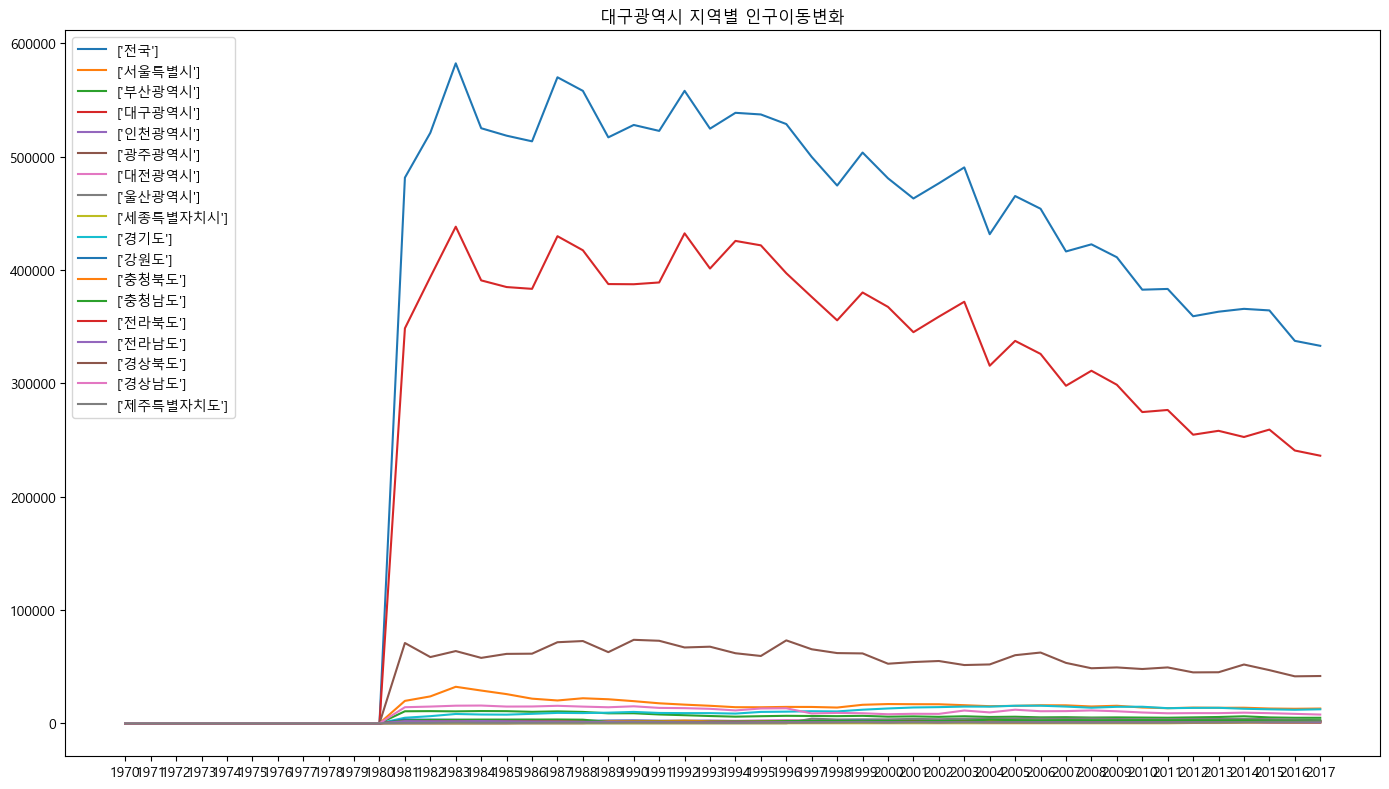

In [25]:
fig=plt.figure(figsize=(14,8))

for i in range(len(Daegu.index)):
    plt.plot(Daegu.loc[Daegu.index[i]], label=[Daegu.index[i]])

plt.legend()
plt.title('대구광역시 지역별 인구이동변화')
plt.tight_layout()
plt.show()